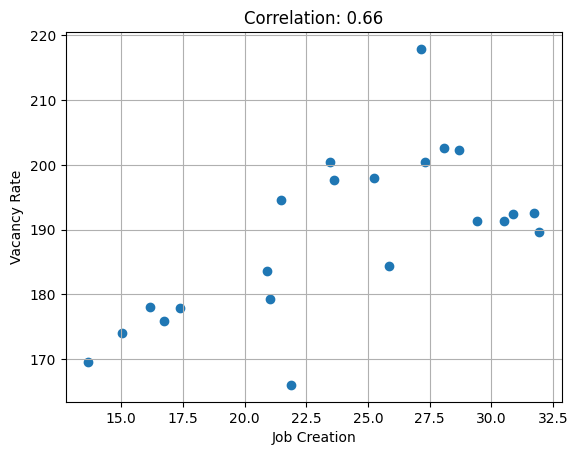

Pearson's Correlation Coefficient: 0.66
The correlation is not strong.


In [11]:
"""skill mismatched supporting evidence
"""
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
# Assuming you have a DataFrame called 'df' with columns 't-jobcreated' and 't-vacancy'
# 't-jobcreated' represents job creation, and 't-vacancy' represents vacancy rates.
# Make sure the columns are properly labeled in your dataset.
df = pd.read_excel('Labourdemand.xlsx')


# Calculate the Pearson correlation coefficient
correlation_coefficient = df['t-jobcreated'].corr(df['t-vacancy'])

# Create a scatter plot to visualize the relationship
plt.scatter(df['t-jobcreated'], df['t-vacancy'])
plt.xlabel('Job Creation')
plt.ylabel('Vacancy Rate')
plt.title(f'Correlation: {correlation_coefficient:.2f}')
plt.grid(True)
plt.show()

# Output the correlation coefficient
print(f"Pearson's Correlation Coefficient: {correlation_coefficient:.2f}")

# Check the strength of the correlation
if correlation_coefficient > 0.7:
    print("There is a strong positive correlation.")
elif correlation_coefficient < -0.7:
    print("There is a strong negative correlation.")
else:
    print("The correlation is not strong.")

    """ correlation coefficient of 0.66 indicates a moderate positive relationship 
    between total job creation and total job vacancy, which can be valuable
      information for understanding workforce dynamics, but it should be further 
      explored and considered alongside other relevant
    factors in any decision-making or policy analysis.
    """


In [10]:
"""compare skill/semi level wether they have significant difference in growth of the jobs"""
import scipy.stats as stats

# Calculate growth rates for job creation and vacancy rates in each category
df['ss-job-growth'] = df['ss-jobcreated'].pct_change() * 100
df['s-job-growth'] = df['s-jobcreated'].pct_change() * 100
df['l-job-growth'] = df['l-jobcreated'].pct_change() * 100

df['ss-vacancy-growth'] = df['ss-vacancy'].pct_change() * 100
df['s-vacancy-growth'] = df['s-vacancy'].pct_change() * 100
df['l-vacancy-growth'] = df['l-vacancy'].pct_change() * 100

# Perform statistical tests (e.g., t-test) to compare the growth rates
# Here, we'll use the t-test to compare the growth of skilled (s-job-growth) and semi-skilled (ss-job-growth) jobs.
t_statistic, p_value = stats.ttest_ind(df['s-job-growth'].dropna(), df['ss-job-growth'].dropna(), equal_var=False)

# You can repeat this for other combinations (e.g., skilled vs. low-skilled, semi-skilled vs. low-skilled)

# Print the results
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Analyze the results and determine if there are significant differences.
if p_value < 0.05:
    print("There are significant differences between the growth of skilled and semi-skilled jobs.")
else:
    print("There are no significant differences between the growth of skilled and semi-skilled jobs.")

"""it suggests that the growth in these job categories is relatively similar.
 This may imply that the labor market is adjusting to the supply and demand for 
 skilled and semi-skilled workers in a balanced manner, reducing the likelihood of 
 a significant job mismatch between these two categories. """


T-Statistic: -0.06121666882330498
P-Value: 0.9515316441690745
There are no significant differences between the growth of skilled and semi-skilled jobs.


In [11]:
"""compare semi-skill and lowskill"""



# Calculate growth rates for job creation in semi-skilled and low-skilled categories
df['ss-job-growth'] = df['ss-jobcreated'].pct_change() * 100
df['l-job-growth'] = df['l-jobcreated'].pct_change() * 100

# Remove NaN values in the growth columns
df.dropna(subset=['ss-job-growth', 'l-job-growth'], inplace=True)

# Perform a two-sample t-test to compare the growth of semi-skilled and low-skilled jobs
t_statistic, p_value = stats.ttest_ind(df['ss-job-growth'], df['l-job-growth'])

# Print the results
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Determine if there are significant differences
alpha = 0.05  # significance level
if p_value < alpha:
    print("There are significant differences between the growth of semi-skilled and low-skilled jobs.")
else:
    print("There are no significant differences between the growth of semi-skilled and low-skilled jobs.")


T-Statistic: -0.6516968344947821
P-Value: 0.5183239387935306
There are no significant differences between the growth of semi-skilled and low-skilled jobs.


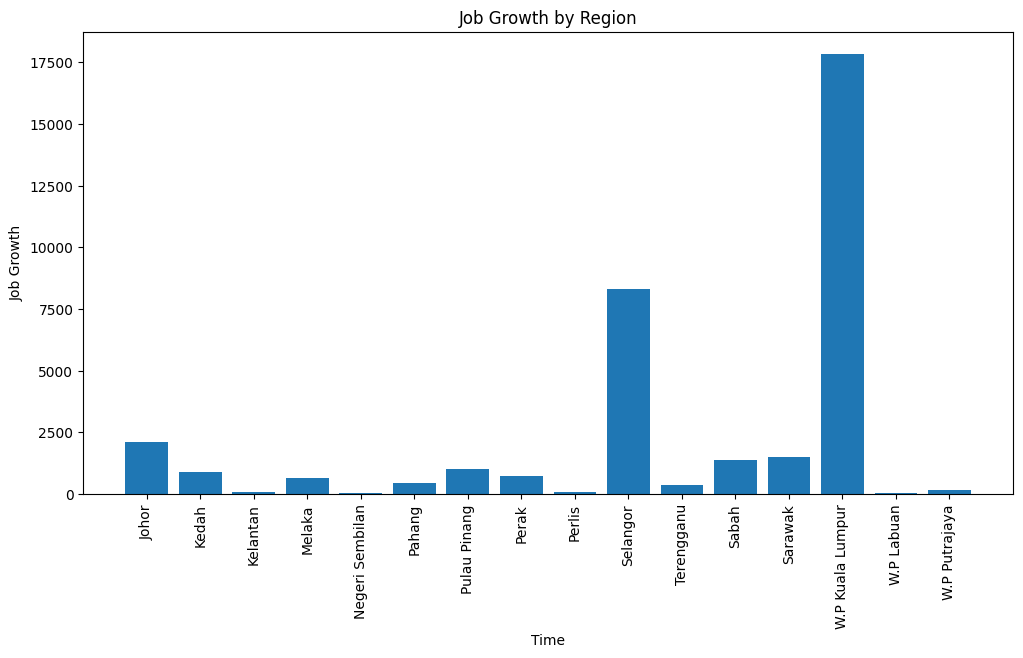

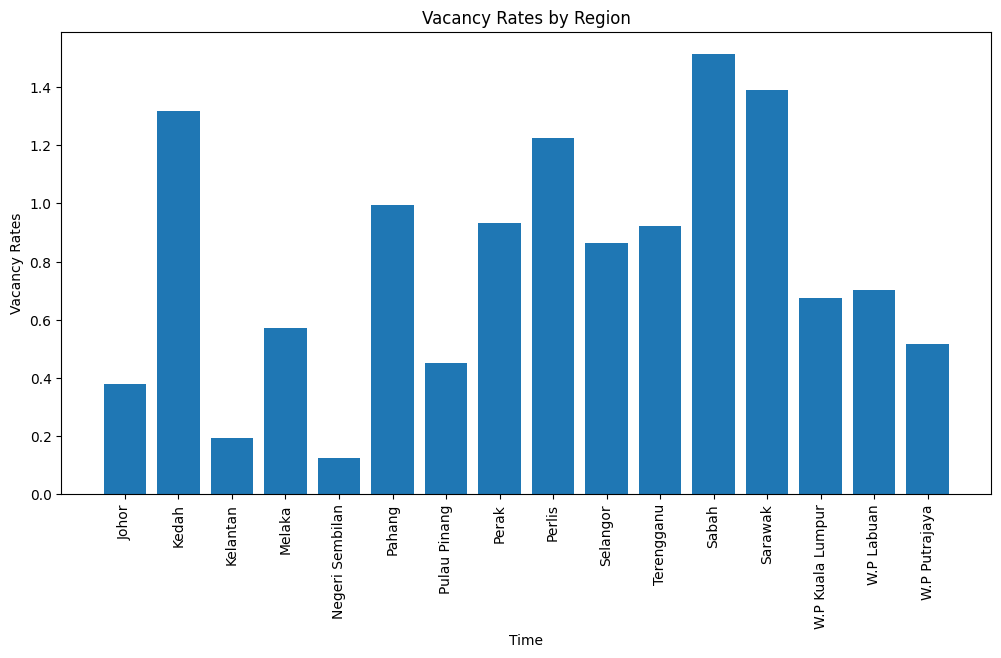

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_excel('jobvacancy_by_regional.xlsx')

# Create a list of regions (all columns except the first one)
regions = df.columns[1:]

# Calculate job growth for each region
# Job Growth = Number of Jobs in the Latest Month - Number of Jobs in the Earliest Month
df["Job Growth"] = df.iloc[:, -1] - df.iloc[:, 1]

# Calculate vacancy rates for each region
# Vacancy Rate = (Number of Job Vacancies) / (Total Number of Jobs)
# mom change
df["Vacancy Rates"] = df.iloc[:, -1] / df.iloc[:, -7]  # Change index -7 to the appropriate month index you want to compare with

# Plot job growth for all regions
plt.figure(figsize=(12, 6))
plt.bar(df["time"], df["Job Growth"])
plt.title("Job Growth by Region")
plt.xlabel("Time")
plt.xticks(rotation=90)
plt.ylabel("Job Growth")
plt.show()

# Plot vacancy rates for all regions
plt.figure(figsize=(12, 6))
plt.bar(df["time"], df["Vacancy Rates"])
plt.title("Vacancy Rates by Region")
plt.xlabel("Time")
plt.xticks(rotation=90)
plt.ylabel("Vacancy Rates")
plt.show()


# Add the latitude and longitude coordinates (update with actual coordinates)
df['Latitude'] = [1.4854, 6.1246, 5.3364, 2.1966, 2.7254, 3.4909, 5.3695, 4.8414, 6.4552, 3.0738, 3.0563, 5.9600, 1.5629, 2.5572, 3.1390, 5.2836]
df['Longitude'] = [103.7577, 100.3673, 102.1746, 102.2483, 101.9360, 102.4459, 100.5275, 100.9957, 100.3705, 101.5183, 102.2515, 116.0735, 110.3438, 113.7001, 101.6869, 100.4593]

# Create a list of regions (all columns except the first one)
regions = df.columns[1:]

# Initialize a map centered around Malaysia
m = folium.Map(location=[4.2105, 101.9758], zoom_start=6)

# Iterate over the rows in your dataset
for state, row in df.iterrows():
    # Create a custom HTML popup for the marker
    popup_html = f"<h4>{state}</h4>"
    
    # Add data to the popup
    popup_html += f"<p>Job Growth: {row['Job Growth']}</p>"
    popup_html += f"<p>Vacancy Rates: {row['Vacancy Rates']}</p>"
    
    # Create a marker for each state
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],  # Use latitude and longitude from your dataset
        popup=folium.Popup(html=popup_html),
        icon=folium.Icon(icon="cloud"),
    ).add_to(m)

# Display the map
m.save('map.html')  # Save the map to an HTML file




from first plot:
Regions with strong economic activities, such as Kuala Lumpur and Selangor, often experience higher job growth. These regions are often hubs for various industries, including finance, technology, and commerce. Besides that, it have higher population density and consumer demand as well.Regions with a well-educated and skilled workforce can be more attractive to businesses, leading to higher job growth. Additionally, the availability of universities and research institutions can promote innovation and job creation.

while in labuan ect,

Regions heavily reliant on a single industry are susceptible to economic volatility, as fluctuations in that sector can significantly impact job growth. Areas with stagnant or declining population growth often face slower job expansion due to reduced demand for goods and services. Moreover, regions suffering from educational and skills gaps may struggle to attract businesses, hindering job creation and economic development. Geographical isolation, with limited connectivity to major markets and transportation hubs, can also impede job growth by constraining businesses' access to essential resources and markets.

Putrajaya, as the administrative capital of Malaysia, is primarily a government center, and its economy is heavily oriented towards the public sector. Government-related jobs tend to grow at a slower pace compared to private sector industries. Putrajaya's job growth may be limited because the government sector doesn't expand as rapidly as industries like technology, manufacturing, or services. Additionally, government budgets and employment are influenced by various factors, including fiscal policies and political decisions, which can affect job creation rates. While Putrajaya plays a crucial role in governance and administration, its economic structure may not facilitate the same level of job growth seen in regions with more diverse and dynamic private sector industries.

second plot:
The bar plot of vacancy rates for Sabah, Sarawak, and Kedah, showing the highest vacancy rates during the analyzed period (calculated half-yearly), suggests potential challenges in these regions' job markets. The elevated vacancy rates could be indicative of factors such as an imbalance between job seekers and offerings, economic conditions specific to these areas, local policies, or seasonal trends in job availability. Further analysis, taking into account industry composition, educational opportunities, population trends, and regional policies, is needed to gain a comprehensive understanding of these variations in job vacancy rates and their underlying causes.

A half-yearly vacancy rate near 1 for regions like Kuala Lumpur (KL) and Selangor indicates a more balanced job market in these areas. A vacancy rate close to 1 typically suggests that the number of job vacancies is in equilibrium with the number of job seekers. It could be a sign of a relatively healthy and stable job market, where opportunities and job openings are well-matched with the available workforce. This balance can be influenced by various factors, including economic activity, industry diversity, educational institutions, and regional policies, all contributing to a more optimal job market in these regions compared to areas with higher or lower vacancy rates.

